In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

print(df) #Вывод датафрейма с данными для лаб. работы. Должно быть 299 наблюдений и 6 признаков

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

Этот код выводит DataFrame df, который содержит данные для лабораторной работы. Комментарий указывает, что ожидается 299 наблюдений (строк) и 6 признаков (столбцов).

Вывод: таблица с данными, содержащая 299 строк и 6 столбцов с различными медицинскими показателями пациентов.

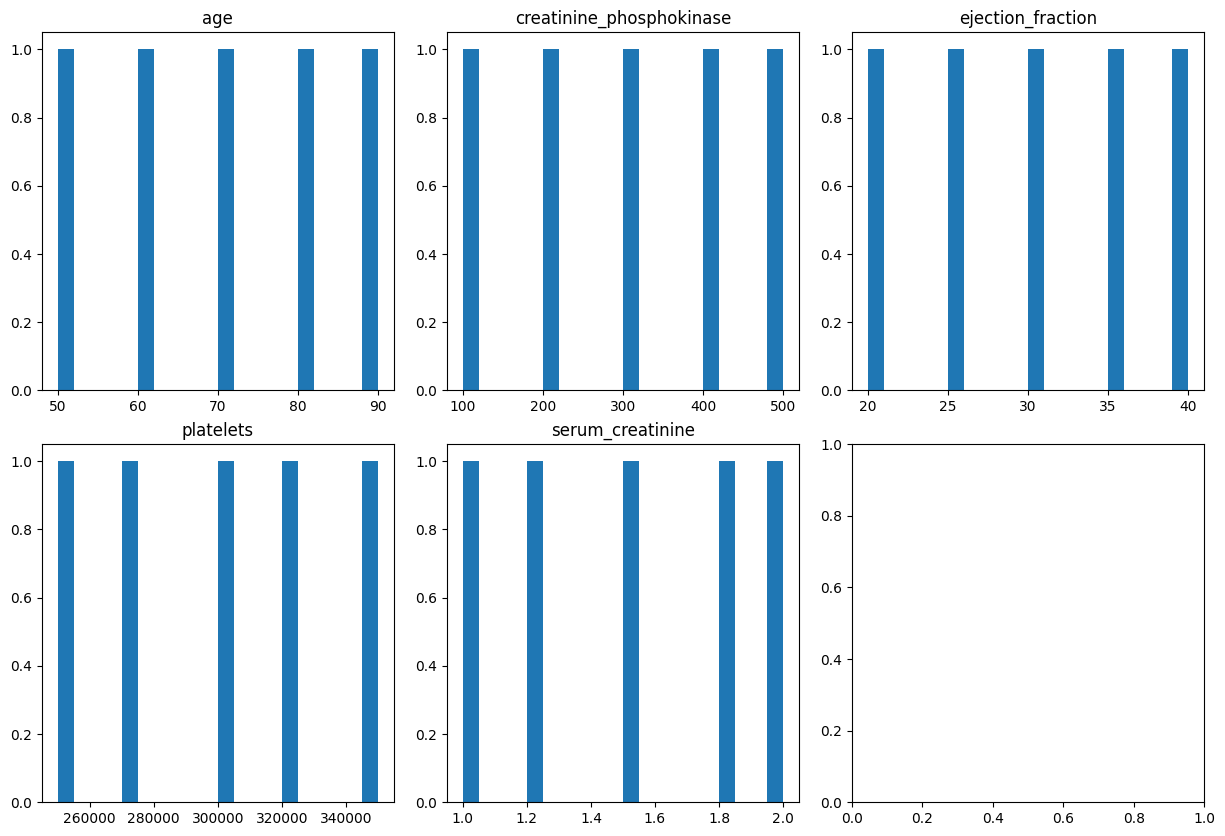

In [70]:
import matplotlib.pyplot as plt
n_bins = 20
# Adjust the figure size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.15)
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
data = df.to_numpy(dtype='float')

Этот код строит гистограммы для каждого из 6 признаков в DataFrame df. Гистограммы позволяют визуально оценить распределение значений каждого признака.

Вывод: 6 гистограмм, каждая из которых показывает распределение значений одного из признаков.

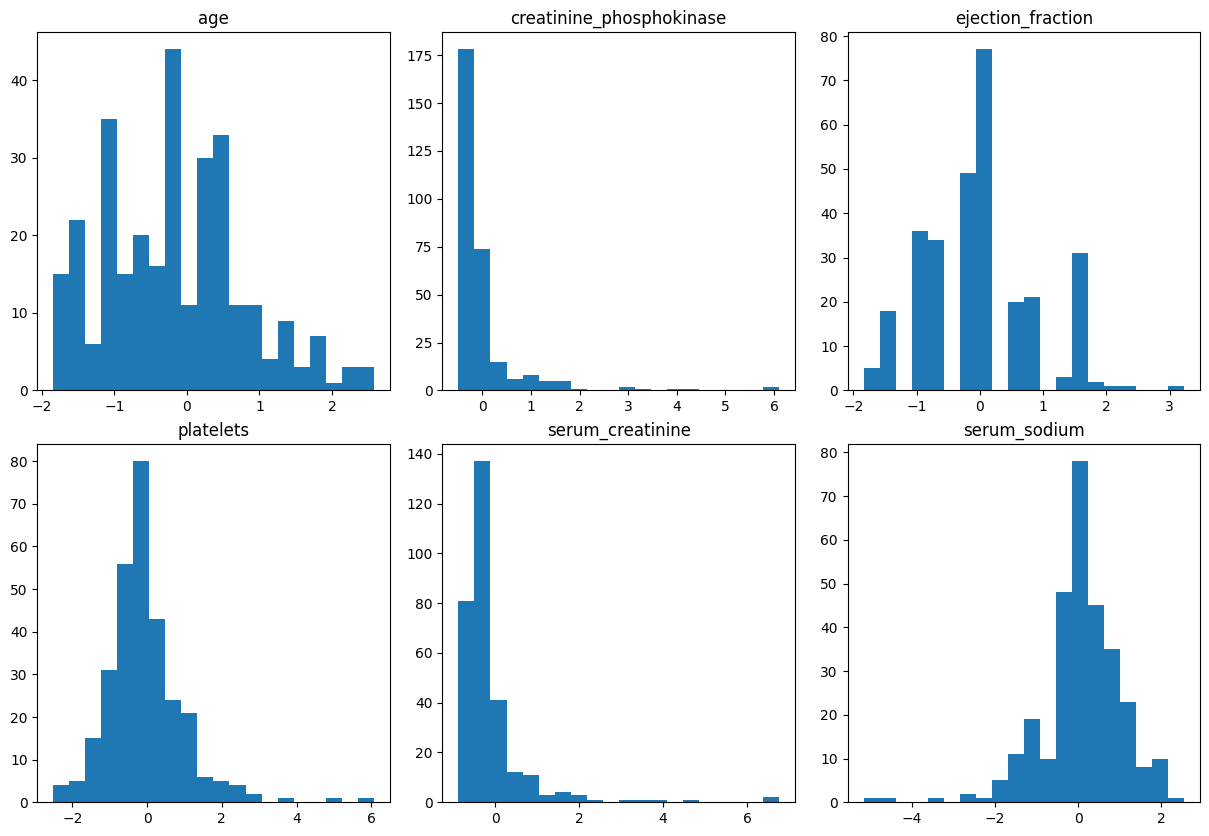

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)

# Adjust the figure size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.15)

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

Этот код выполняет стандартизацию данных с помощью StandardScaler.

In [ ]:
# Мат. ожидание и СКО до стандартизации
mean_before = np.mean(data, axis=0)
std_before = np.std(data, axis=0)

# Мат. ожидание и СКО после стандартизации
mean_after = np.mean(data_scaled, axis=0)
std_after = np.std(data_scaled, axis=0)

print("Мат. ожидание до стандартизации:", mean_before)
print("СКО до стандартизации:", std_before)
print("Мат. ожидание после стандартизации:", mean_after)
print("СКО после стандартизации:", std_after)

# z = (x - mean) / std - формула стандартизации (mean - зн. признака, std - зн. отклонения)

# Вывод значений mean_ и scale_ объекта scaler
print("mean_:", scaler.mean_)
print("scale_:", scaler.scale_)

# Вывод значений, рассчитанных по формулам
print("mean_before:", mean_before)
print("std_before:", std_before)

# Стандартизация на всех данных
scaler_all = preprocessing.StandardScaler().fit(data)
data_scaled_all = scaler_all.transform(data)

# Мат. ожидание и СКО после стандартизации на всех данных
mean_after_all = np.mean(data_scaled_all, axis=0)
std_after_all = np.std(data_scaled_all, axis=0)

print("Мат. ожидание после стандартизации на всех данных:", mean_after_all)
print("СКО после стандартизации на всех данных:", std_after_all)

Мат. ожидание до стандартизации: [6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
СКО до стандартизации: [1.18749014e+01 9.68663967e+02 1.18150335e+01 9.76405477e+04
 1.03277867e+00 4.40509238e+00]
Мат. ожидание после стандартизации: [-0.16970362 -0.02127675  0.01050249 -0.03522879 -0.1086408   0.0379076 ]
СКО после стандартизации: [0.95382379 0.81417905 0.90610822 1.01506113 0.88542887 0.9703736 ]
mean_: [6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02]
scale_: [1.24497854e+01 1.18974318e+03 1.30393183e+01 9.61917902e+04
 1.16641630e+00 4.53958393e+00]
mean_before: [6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
std_before: [1.18749014e+01 9.68663967e+02 1.18150335e+01 9.76405477e+04
 1.03277867e+00 4.40509238e+00]
Мат. ожидание после стандартизации на всех данных: [ 5.70335306e-16  0.00000000e+00 -3.26754603e-17  7.72329061e-17
  1.42583827e-16 -8.673849

Выводятся математическое ожидание и стандартное отклонение до и после стандартизации, а также значения mean_ and scale_ объекта scaler.

Вывод:

Значения математического ожидания и стандартного отклонения для каждого признака до стандартизации.
Значения математического ожидания и стандартного отклонения для каждого признака после стандартизации (близки к 0 и 1 соответственно).
Значения mean_ (средние значения) и scale_ (стандартные отклонения), использованные для стандартизации.
Аналогичные значения после стандартизации на всех данных

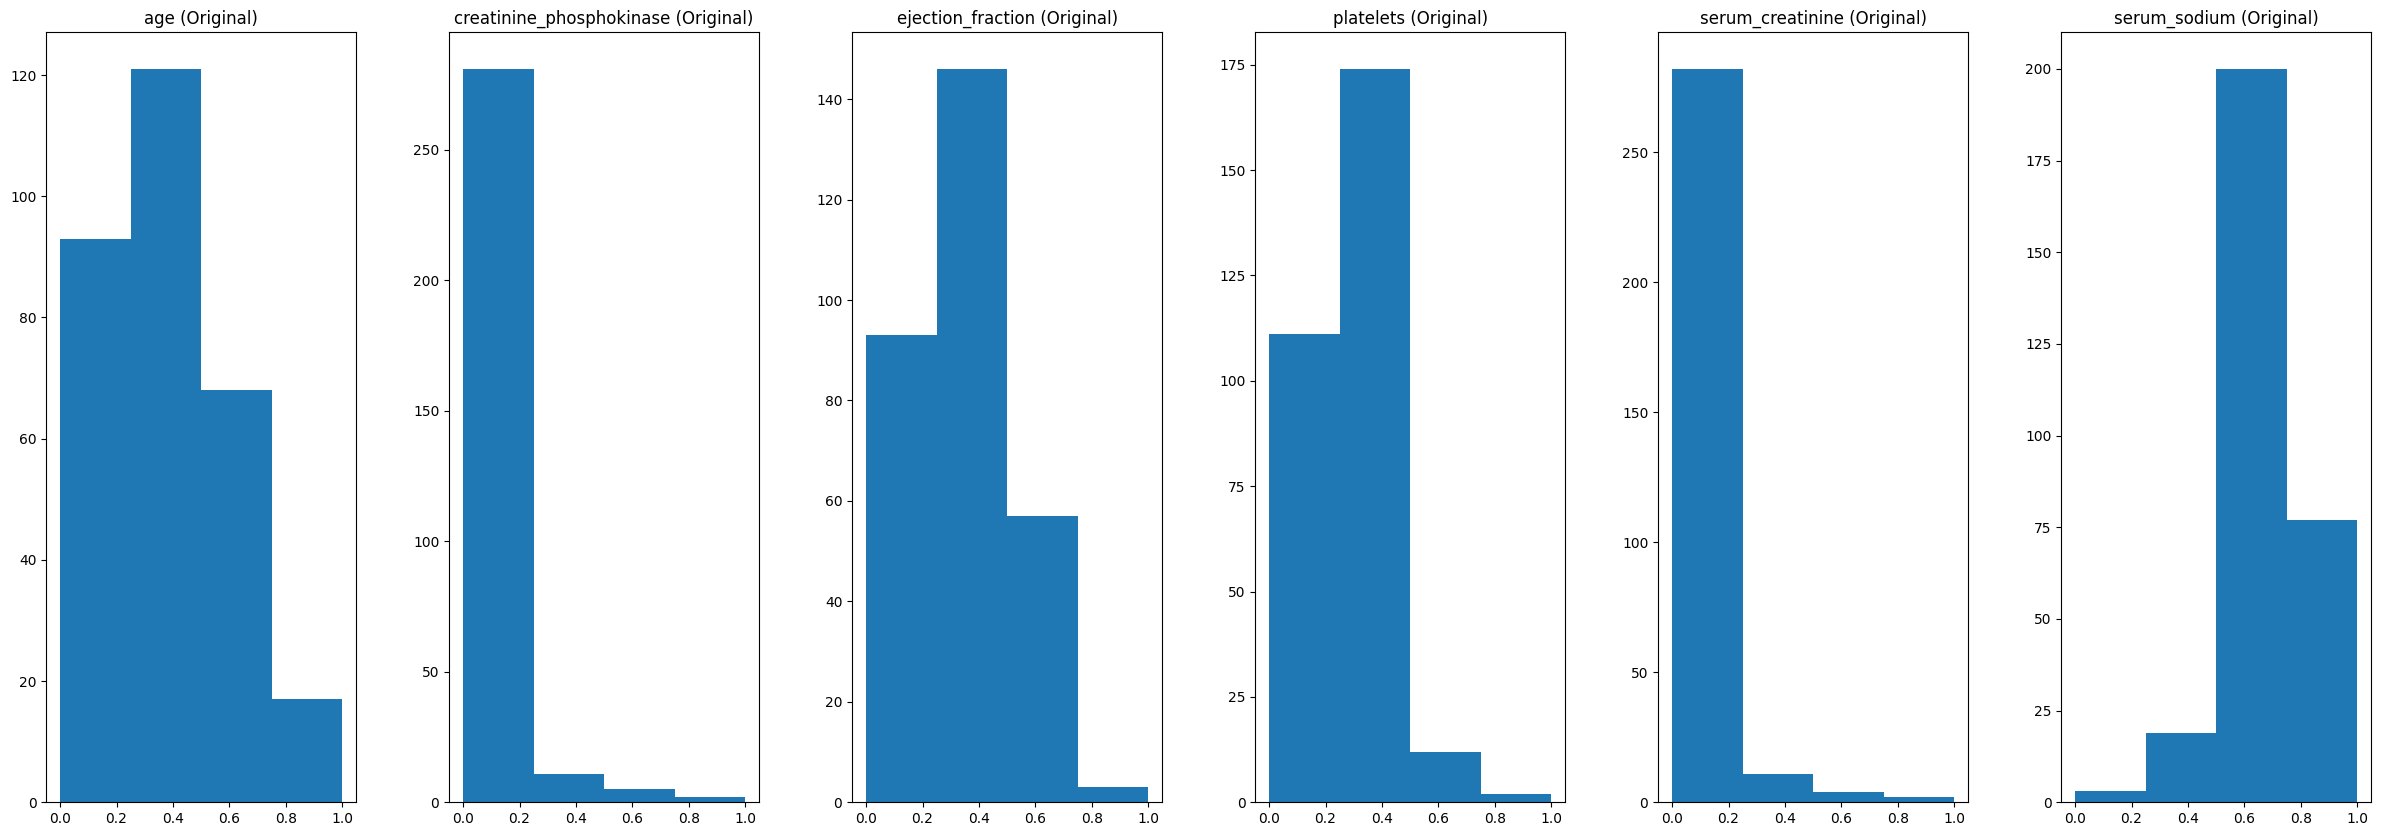

In [49]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

# Assuming data_scaled contains your scaled data

# Create a figure with two sets of subplots
fig, axs = plt.subplots(1, 6, figsize=(30, 10))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot original data histograms
for i in range(6):
    axs[i].hist(data_min_max_scaled[:, i], bins=n_bins)
    axs[i].set_title(df.columns[i] + ' (min-max)')

plt.show()

In [ ]:
min_values = min_max_scaler.data_min_
max_values = min_max_scaler.data_max_

print("Minimum values:", min_values)
print("Maximum values:", max_values)

Minimum values: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Maximum values: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]


Этот код масштабирует данные с помощью MinMaxScaler, приводя их к диапазону [0, 1]. Выводятся минимальные и максимальные значения каждого признака.

Вывод:

6 гистограмм исходных данных и 6 гистограмм данных, масштабированных с помощью MinMaxScaler.
Минимальные значения каждого признака.
Максимальные значения каждого признака.

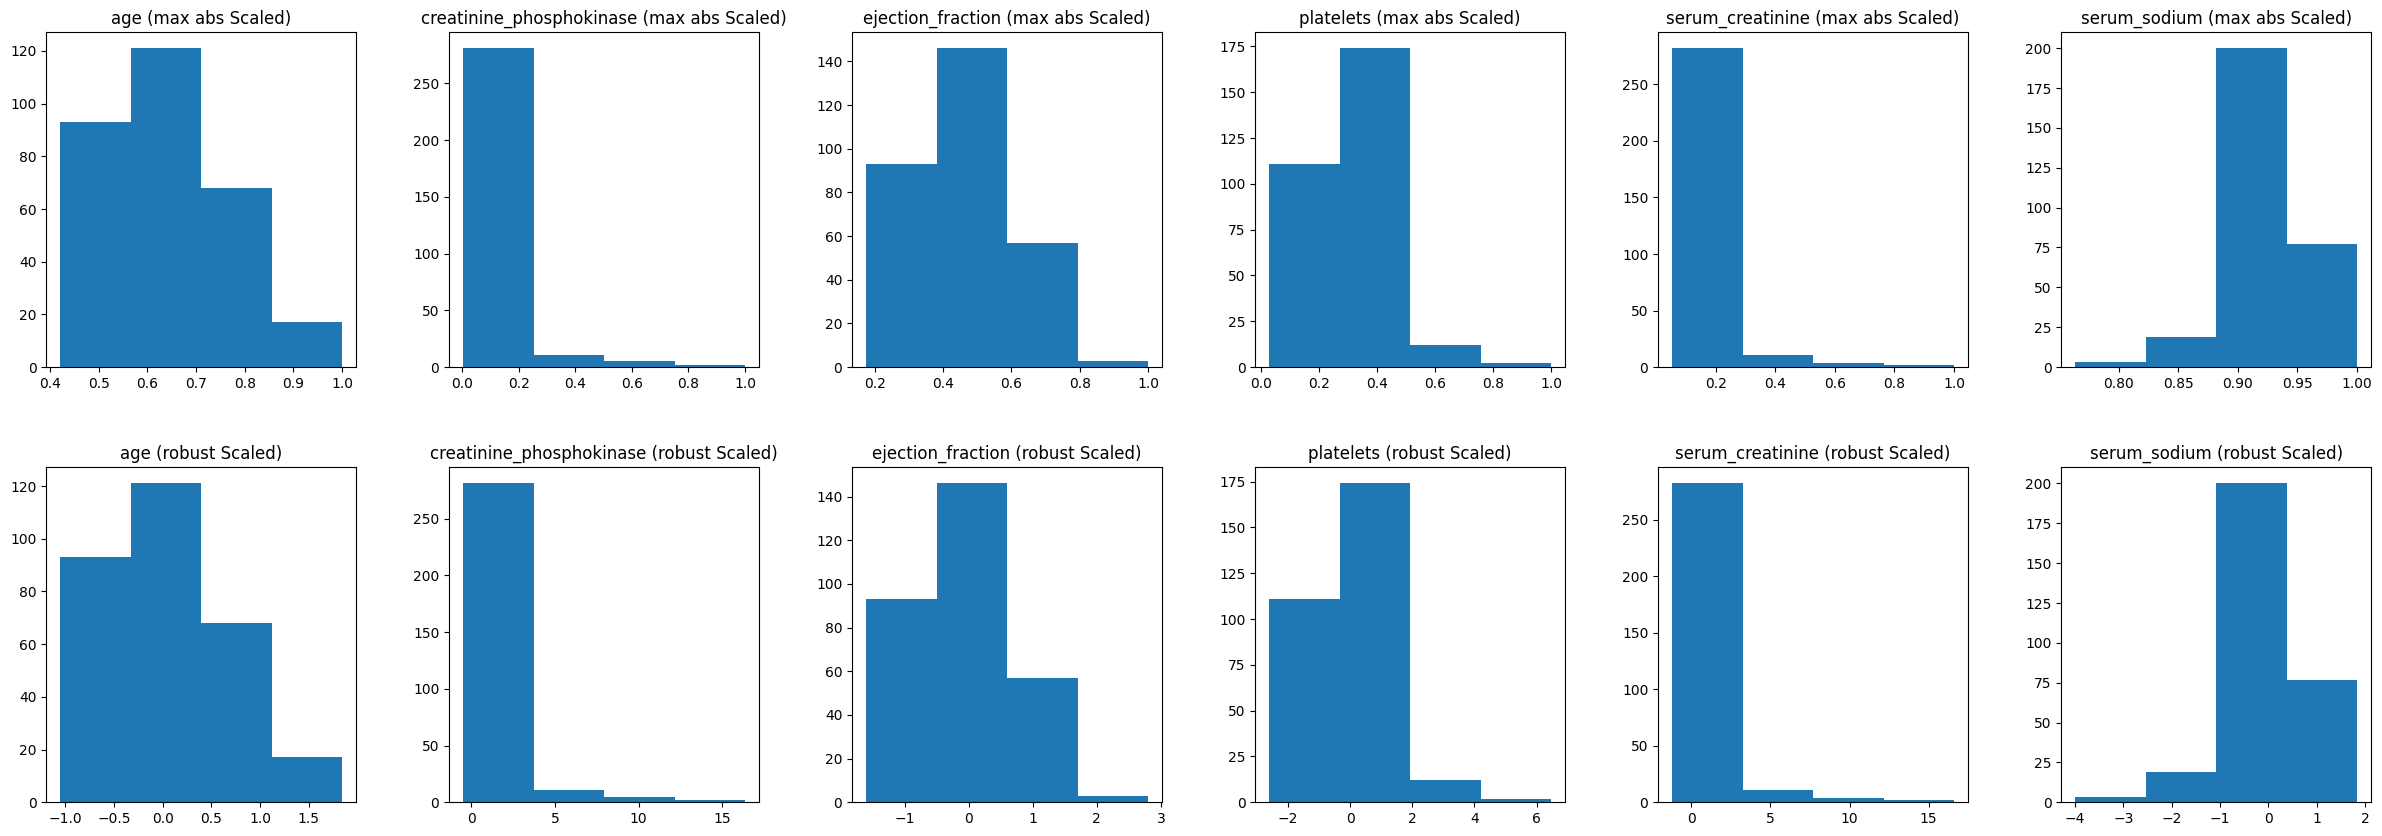

MaxAbsScaler range: [-1, 1]
RobustScaler range: Interquartile range


In [51]:
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

# MaxAbsScaler
max_abs_scaler = MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

# RobustScaler
robust_scaler = RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)

# Create histograms (similar to step 2)
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

# Create a figure with two sets of subplots
fig, axs = plt.subplots(2, 6, figsize=(30, 10))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)


# Plot scaled max abs data histograms
for k in range(6):
    axs[0, k].hist(data_max_abs_scaled[:, k], bins=n_bins)
    axs[0, k].set_title(df.columns[k] + ' (max abs Scaled)')

for k in range(6):
    axs[1, k].hist(data_robust_scaled[:, k], bins=n_bins)
    axs[1, k].set_title(df.columns[k] + ' (robust Scaled)')
plt.show()

# Output ranges
print("MaxAbsScaler range: [-1, 1]")  # Always scales to [-1, 1]
print("RobustScaler range: Interquartile range")  # Scales based on IQR

Этот код масштабирует данные с помощью MaxAbsScaler и RobustScaler. Выводятся диапазоны значений для каждого метода.

Вывод:

Сообщение о том, что MaxAbsScaler масштабирует данные к диапазону [-1, 1].
Сообщение о том, что RobustScaler масштабирует данные на основе межквартильного размаха.

In [ ]:
def custom_scale(data):
    min_val = -5
    max_val = 10
    scaled_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))  # Scale to [0, 1]
    scaled_data = scaled_data * (max_val - min_val) + min_val  # Scale to [-5, 10]
    return scaled_data

data_custom_scaled = custom_scale(data)
print(data_custom_scaled)

[[ 4.54545455 -3.93021179 -3.63636364 -0.63765305 -2.64044944  2.28571429]
 [-0.90909091 10.          0.45454545 -0.66751067 -3.98876404  4.85714286]
 [ 1.81818182 -4.76460832 -3.63636364 -2.51060735 -3.65168539  1.85714286]
 ...
 [-3.63636364 -1.1016841   5.45454545  8.03612559 -4.49438202  5.71428571]
 [-3.63636364 -0.42612911  0.45454545 -2.91065584 -3.48314607  6.57142857]
 [-2.27272727 -4.66892064  2.04545455  1.72626985 -3.14606742  4.85714286]]


Этот код выполняет пользовательское масштабирование данных, приводя их к диапазону [-5, 10]. Выводятся масштабированные данные.

Вывод: таблица с данными, масштабированными в диапазон [-5, 10]

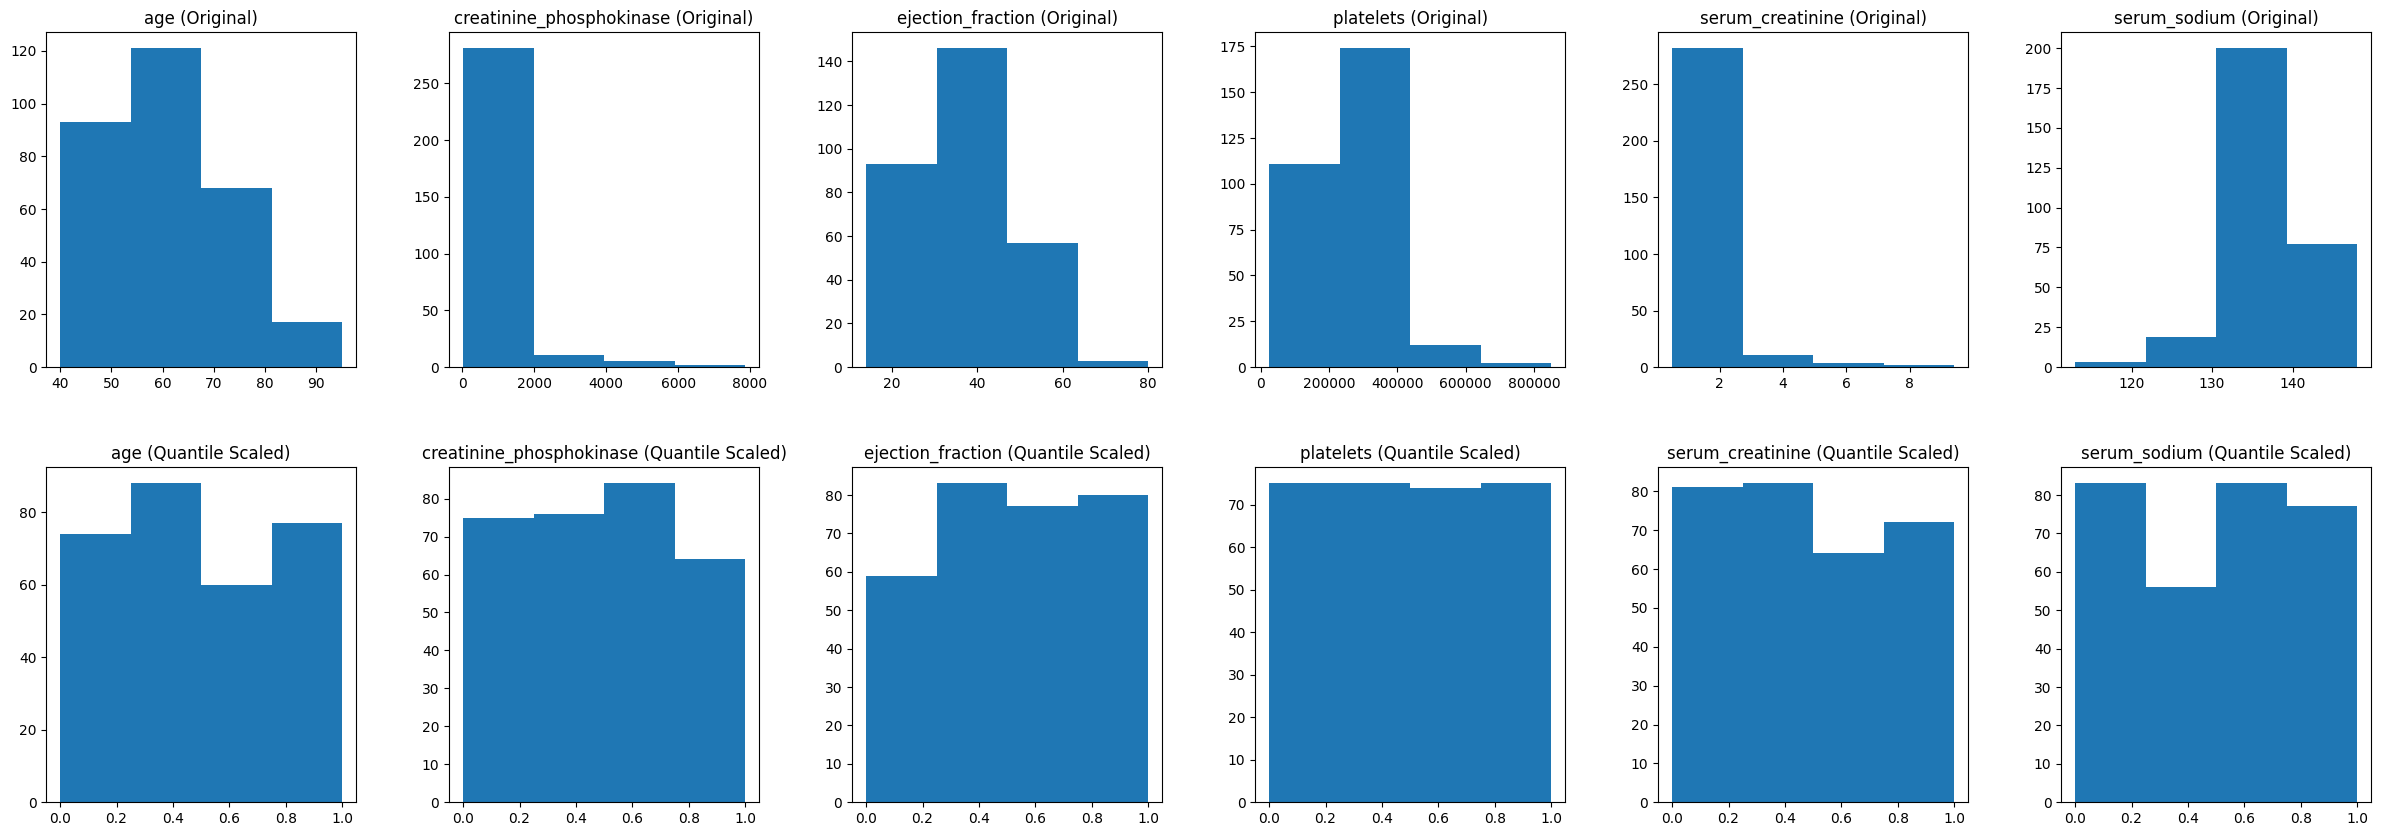

In [53]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(n_quantiles=100, random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

# Assuming data_quantile_scaled contains your transformed data

# Create a figure with two sets of subplots
fig, axs = plt.subplots(2, 6, figsize=(30, 10))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot original data histograms
for i in range(6):
    axs[0, i].hist(data[:, i], bins=n_bins)
    axs[0, i].set_title(df.columns[i] + ' (Original)')

# Plot scaled data histograms
for i in range(6):
    axs[1, i].hist(data_quantile_scaled[:, i], bins=n_bins)
    axs[1, i].set_title(df.columns[i] + ' (Quantile Scaled)')

plt.show()

Этот код выполняет масштабирование данных с помощью QuantileTransformer, преобразуя их к равномерному распределению.

Вывод: 6 гистограмм исходных данных и 6 гистограмм данных, масштабированных с помощью QuantileTransformer.

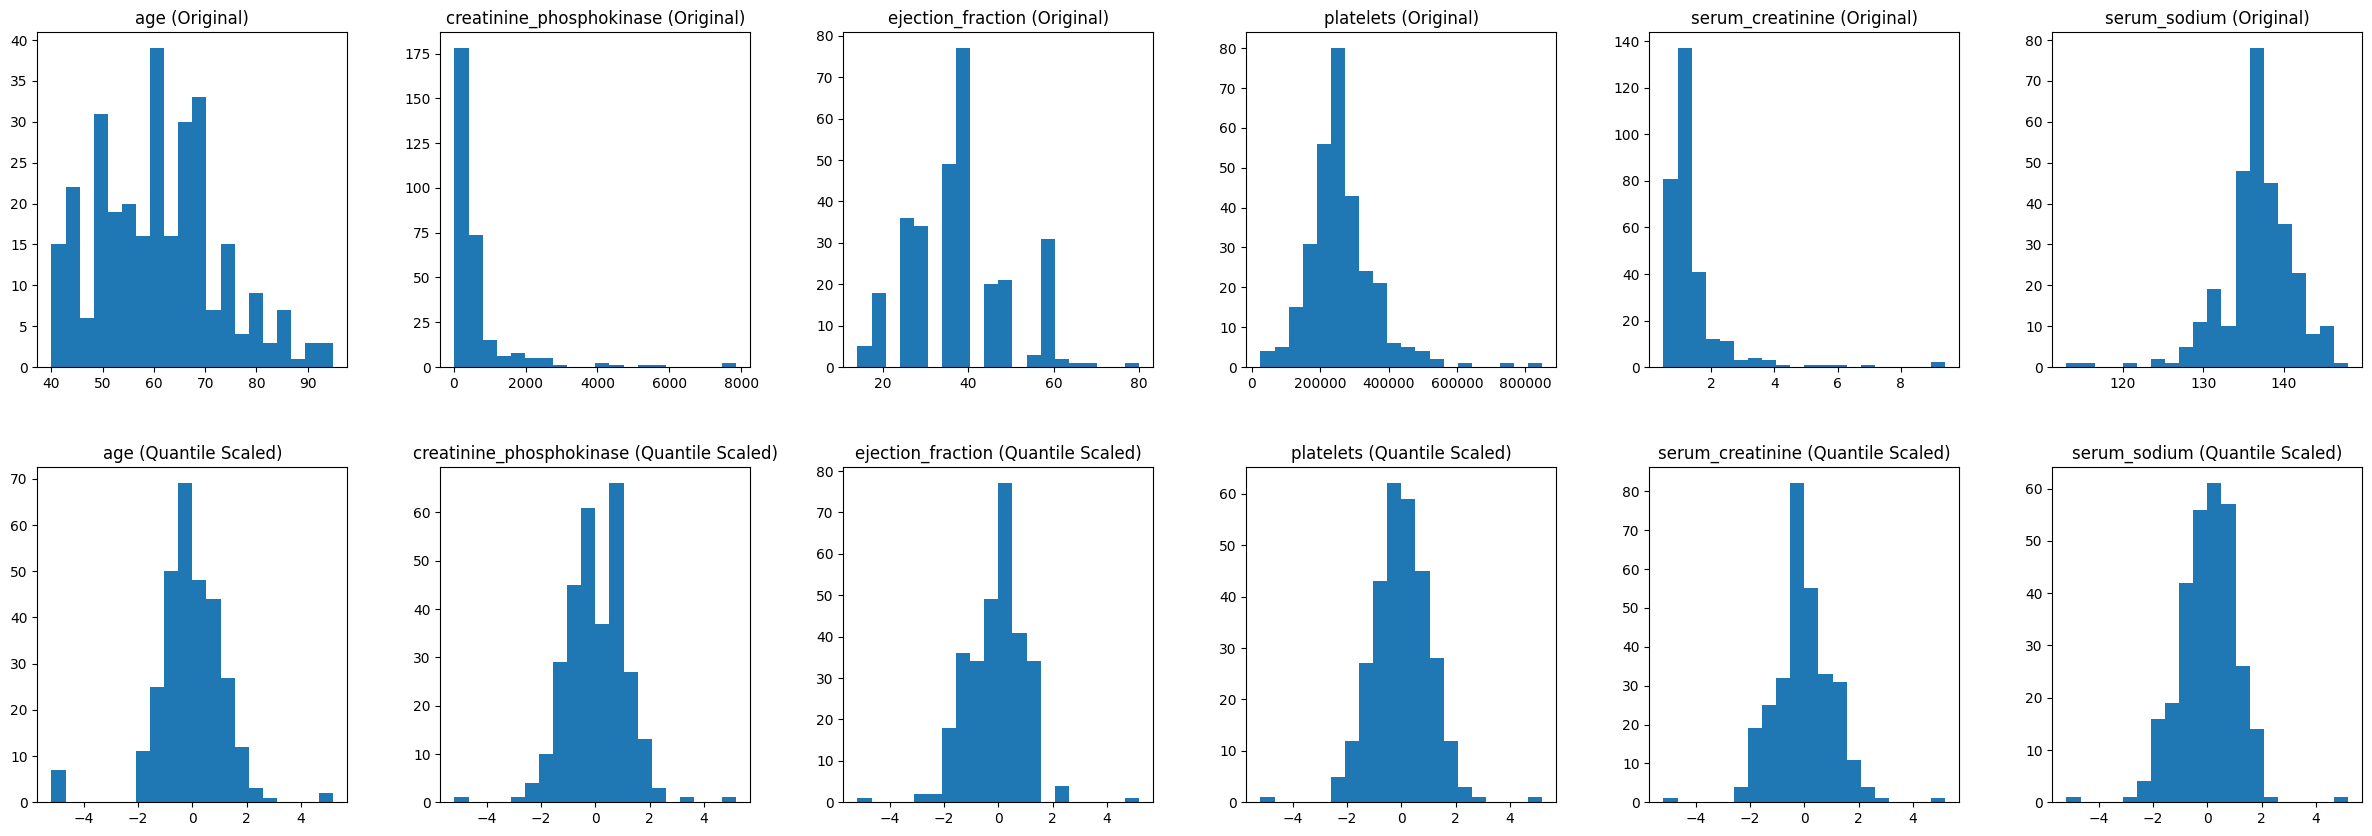

In [ ]:
quantile_transformer_normal = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=0).fit(data)
data_quantile_scaled_normal = quantile_transformer_normal.transform(data)

# Create a figure with two sets of subplots
fig, axs = plt.subplots(2, 6, figsize=(30, 10))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot original data histograms
for i in range(6):
    axs[0, i].hist(data[:, i], bins=n_bins)
    axs[0, i].set_title(df.columns[i] + ' (Original)')

# Plot scaled data histograms
for i in range(6):
    axs[1, i].hist(data_quantile_scaled_normal[:, i], bins=n_bins)
    axs[1, i].set_title(df.columns[i] + ' (Quantile Scaled normal)')

plt.show()

Этот код выполняет масштабирование данных с помощью QuantileTransformer, преобразуя их к нормальному распределению.

Вывод: 6 гистограмм исходных данных и 6 гистограмм данных, масштабированных с помощью QuantileTransformer с нормальным распределением.

In [ ]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson').fit(data)  # 'yeo-johnson' or 'box-cox'
data_power_scaled = power_transformer.transform(data)

Этот код выполняет масштабирование данных с помощью PowerTransformer, пытаясь сделать распределение данных более нормальным.

In [77]:
"""from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Assuming 'df' is your DataFrame
features_to_discretize = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
n_bins_list = [3, 4, 3, 10, 2, 4]  # Number of bins for each feature

discretizers = {}  # Store discretizers for each feature
discretizer = KBinsDiscretizer(n_bins=n_bins_list, encode='ordinal', strategy='uniform')  # You can change strategy if needed
print(discretizer)
for feature, n_bins in zip(features_to_discretize, n_bins_list):
    df[feature + '_discretized'] = discretizer.fit_transform(df[[feature]])
    discretizers[feature] = discretizer  # Store the discretizer

# Display the DataFrame with discretized features
print(df.head())"""

from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Assuming 'data' is your NumPy array and it has 12 columns
# Select only the first 6 columns from 'data'
selected_data = data[:, :6]  # Select columns 0 to 5

# Create a DataFrame using the selected columns and provided names
df = pd.DataFrame(selected_data, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])

features_to_discretize = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
n_bins_list = [3, 4, 3, 10, 2, 4]  # Number of bins for each feature

# Discretize each feature separately
for feature, n_bins in zip(features_to_discretize, n_bins_list):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    df[feature + '_discretized'] = discretizer.fit_transform(df[[feature]])

# Display the result
print(df.head())

    age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  50.0                     100.0               20.0   250000.0   
1  60.0                     200.0               25.0   270000.0   
2  70.0                     300.0               30.0   300000.0   
3  80.0                     400.0               35.0   320000.0   
4  90.0                     500.0               40.0   350000.0   

   serum_creatinine  serum_sodium  age_discretized  \
0               1.0         135.0              0.0   
1               1.2         137.0              0.0   
2               1.5         140.0              1.0   
3               1.8         143.0              2.0   
4               2.0         145.0              2.0   

   creatinine_phosphokinase_discretized  ejection_fraction_discretized  \
0                                   0.0                            0.0   
1                                   1.0                            0.0   
2                                   2.0           

Этот код выполняет дискретизацию данных с помощью KBinsDiscretizer, разбивая значения признаков на заданное количество бинов. Выводятся первые строки DataFrame с добавленными дискретизированными признаками.

Вывод: первые 5 строк DataFrame df, в котором добавлены новые столбцы с дискретизированными значениями признаков.

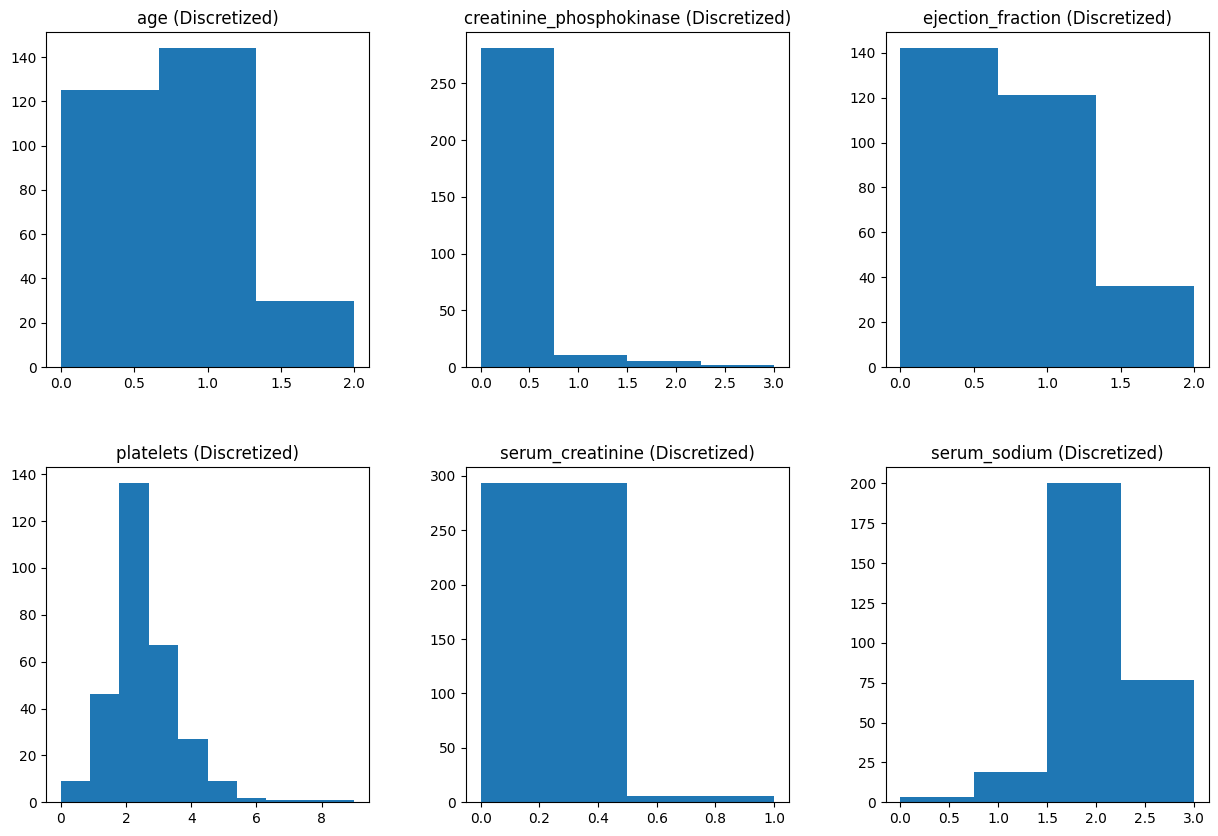

In [ ]:
import matplotlib.pyplot as plt

# Adjust figure size if needed
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot histograms for each discretized feature
for i, feature in enumerate(features_to_discretize):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df[feature + '_discretized'], bins=n_bins_list[i])
    axs[row, col].set_title(feature + ' (Discretized)')

plt.show()

In [79]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Assuming 'data' is your NumPy array and it has 12 columns
# Select only the first 6 columns from 'data'
selected_data = data[:, :6]  # Select columns 0 to 5

# Create a DataFrame using the selected columns and provided names
df = pd.DataFrame(selected_data, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])

features_to_discretize = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
n_bins_list = [3, 4, 3, 10, 2, 4]  # Number of bins for each feature

discretizers = {}  # Store discretizers for each feature

# Discretize each feature separately and store the discretizer
for feature, n_bins in zip(features_to_discretize, n_bins_list):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    df[feature + '_discretized'] = discretizer.fit_transform(df[[feature]])
    discretizers[feature] = discretizer  # Store the discretizer for the current feature


# Display the result
print(df.head())

for feature in features_to_discretize:
    bin_edges = discretizers[feature].bin_edges_[0]  # Get bin edges for the feature
    print(f"Bin ranges for {feature}:")
    for i in range(len(bin_edges) - 1):
        print(f"  Bin {i}: [{bin_edges[i]:.2f}, {bin_edges[i + 1]:.2f})")  # Print bin ranges

    age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  50.0                     100.0               20.0   250000.0   
1  60.0                     200.0               25.0   270000.0   
2  70.0                     300.0               30.0   300000.0   
3  80.0                     400.0               35.0   320000.0   
4  90.0                     500.0               40.0   350000.0   

   serum_creatinine  serum_sodium  age_discretized  \
0               1.0         135.0              0.0   
1               1.2         137.0              0.0   
2               1.5         140.0              1.0   
3               1.8         143.0              2.0   
4               2.0         145.0              2.0   

   creatinine_phosphokinase_discretized  ejection_fraction_discretized  \
0                                   0.0                            0.0   
1                                   1.0                            0.0   
2                                   2.0           

Этот код строит гистограммы для каждого дискретизированного признака.

Вывод: 6 гистограмм, каждая из которых показывает распределение значений одного из дискретизированных признаков.